In [138]:
## Import Libraries
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
%matplotlib inline

In [98]:
 ## load data
data = pd.read_csv("Documents\Titanic_train.csv") 

In [99]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [100]:
## data type
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
## Drop columns that do not contribute
data = data.drop(["Name","PassengerId","Ticket","Cabin"],axis=1)

In [102]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [103]:
## data type
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [104]:
## encode sex column
a=pd.get_dummies(data.Sex).astype(int)
a=a.drop("female", axis=1)
data = pd.concat([a,data],axis=1)

In [105]:
data

,male,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,0,1,1,female,38.0,1,0,71.2833,C
2,0,1,3,female,26.0,0,0,7.9250,S
3,0,1,1,female,35.0,1,0,53.1000,S
4,1,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,1,0,2,male,27.0,0,0,13.0000,S
887,0,1,1,female,19.0,0,0,30.0000,S
888,0,0,3,female,NaN,1,2,23.4500,S
889,1,1,1,male,26.0,0,0,30.0000,C


In [106]:
## Fill missing Age values
data['Age'].fillna(data['Age'].median(), inplace=True)

In [107]:
 ## column sex 1 = male  /  0 = female
data= data.drop("Sex",axis=1)
data.rename(columns = {"male":"Sex"},inplace = True)
data                                                

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,22.0,1,0,7.2500,S
1,0,1,1,38.0,1,0,71.2833,C
2,0,1,3,26.0,0,0,7.9250,S
3,0,1,1,35.0,1,0,53.1000,S
4,1,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,1,0,2,27.0,0,0,13.0000,S
887,0,1,1,19.0,0,0,30.0000,S
888,0,0,3,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [108]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [109]:
## encode embarked
Embark = pd.get_dummies(data.Embarked).astype(int)
data = pd.concat([Embark,data],axis=1)
data = data.drop("Embarked",axis=1)

In [110]:
data

,C,Q,S,Sex,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,0,1,1,0,3,22.0,1,0,7.2500
1,1,0,0,0,1,1,38.0,1,0,71.2833
2,0,0,1,0,1,3,26.0,0,0,7.9250
3,0,0,1,0,1,1,35.0,1,0,53.1000
4,0,0,1,1,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,1,0,2,27.0,0,0,13.0000
887,0,0,1,0,1,1,19.0,0,0,30.0000
888,0,0,1,0,0,3,28.0,1,2,23.4500
889,1,0,0,1,1,1,26.0,0,0,30.0000


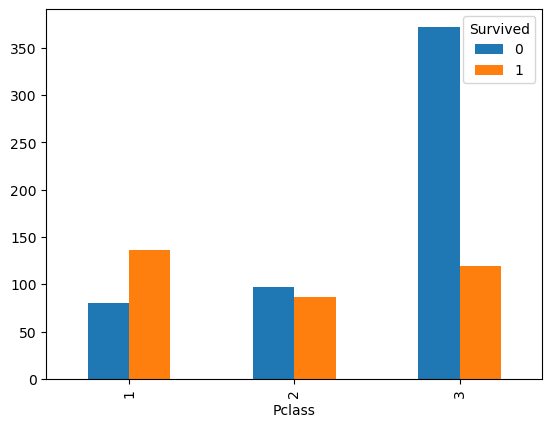

In [111]:
## bar chart pclass and survived
data.groupby('Pclass')['Survived'].value_counts().unstack().plot(kind='bar')
plt.show()

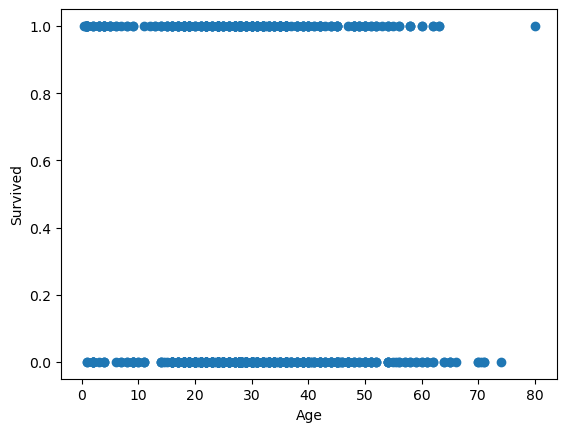

In [112]:
plt.scatter(data.Age, data.Survived)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

In [113]:
## Survived = 342    Did not survive = 549
data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [114]:
## divide data
x = data.drop("Survived", axis=1)
y = data.Survived

In [115]:
x

,C,Q,S,Sex,Pclass,Age,SibSp,Parch,Fare
0,0,0,1,1,3,22.0,1,0,7.2500
1,1,0,0,0,1,38.0,1,0,71.2833
2,0,0,1,0,3,26.0,0,0,7.9250
3,0,0,1,0,1,35.0,1,0,53.1000
4,0,0,1,1,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,0,0,1,1,2,27.0,0,0,13.0000
887,0,0,1,0,1,19.0,0,0,30.0000
888,0,0,1,0,3,28.0,1,2,23.4500
889,1,0,0,1,1,26.0,0,0,30.0000


In [116]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [117]:
x.isnull().sum()

C         0
Q         0
S         0
Sex       0
Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
## Train-Test Split
## 80% train 20% test stratify y
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,stratify=y)

In [120]:
xtrain

,C,Q,S,Sex,Pclass,Age,SibSp,Parch,Fare
27,0,0,1,1,1,19.0,3,2,263.0000
733,0,0,1,1,2,23.0,0,0,13.0000
144,0,0,1,1,2,18.0,0,0,11.5000
582,0,0,1,1,2,54.0,0,0,26.0000
535,0,0,1,0,2,7.0,0,2,26.2500
...,...,...,...,...,...,...,...,...,...
704,0,0,1,1,3,26.0,1,0,7.8542
706,0,0,1,0,2,45.0,0,0,13.5000
726,0,0,1,0,2,30.0,3,0,21.0000
764,0,0,1,1,3,16.0,0,0,7.7750


In [121]:
xtest

,C,Q,S,Sex,Pclass,Age,SibSp,Parch,Fare
655,0,0,1,1,2,24.0,2,0,73.5000
569,0,0,1,1,3,32.0,0,0,7.8542
398,0,0,1,1,2,23.0,0,0,10.5000
564,0,0,1,0,3,28.0,0,0,8.0500
610,0,0,1,0,3,39.0,1,5,31.2750
...,...,...,...,...,...,...,...,...,...
200,0,0,1,1,3,28.0,0,0,9.5000
66,0,0,1,0,2,29.0,0,0,10.5000
686,0,0,1,1,3,14.0,4,1,39.6875
455,1,0,0,1,3,29.0,0,0,7.8958


In [122]:
ytrain

27     0
733    0
144    0
582    0
535    1
      ..
704    0
706    1
726    1
764    0
707    1
Name: Survived, Length: 712, dtype: int64

In [123]:
ytest

655    0
569    1
398    0
564    0
610    0
      ..
200    0
66     1
686    0
455    1
97     1
Name: Survived, Length: 179, dtype: int64

In [124]:
np.unique(xtest)

array([  0.    ,   0.83  ,   1.    ,   2.    ,   3.    ,   4.    ,
         5.    ,   6.4958,   7.05  ,   7.0542,   7.225 ,   7.2292,
         7.25  ,   7.65  ,   7.725 ,   7.7292,   7.7375,   7.75  ,
         7.775 ,   7.8   ,   7.8292,   7.8542,   7.8792,   7.8958,
         7.925 ,   8.    ,   8.05  ,   8.1125,   8.6625,   8.85  ,
         9.    ,   9.4833,   9.5   ,   9.825 ,  10.    ,  10.5   ,
        11.    ,  11.1333,  11.2417,  11.5   ,  12.35  ,  12.475 ,
        13.    ,  13.5   ,  13.8583,  14.    ,  14.4542,  14.5   ,
        15.05  ,  15.2458,  15.5   ,  15.7417,  15.75  ,  15.85  ,
        15.9   ,  16.    ,  17.    ,  17.8   ,  18.    ,  19.    ,
        20.    ,  20.525 ,  20.575 ,  21.    ,  21.075 ,  22.    ,
        23.    ,  23.45  ,  23.5   ,  24.    ,  24.15  ,  25.    ,
        25.4667,  26.    ,  26.2833,  26.2875,  26.55  ,  27.    ,
        27.7208,  27.9   ,  28.    ,  29.    ,  29.125 ,  30.    ,
        30.0708,  30.5   ,  31.    ,  31.275 ,  31.3875,  32. 

In [125]:
model = LogisticRegression()

In [126]:
## training model
model.fit(xtrain,ytrain)

LogisticRegression()

In [127]:
## M
model.coef_

array([[ 1.32417484e+00,  1.04867374e+00,  7.88254947e-01,
        -2.66896792e+00, -1.02405933e+00, -4.06709586e-02,
        -3.08163476e-01, -8.12557054e-02,  2.24387272e-03]])

In [128]:
## b
model.intercept_

array([3.88175694])

In [148]:
##pprediction xtest
prediction  = model.predict(xtest)
prediction

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1])

In [151]:
ytest.values

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1])

In [137]:
len(ytrain)

712

In [140]:
## score train
train = model.score(xtrain,ytrain)
train

0.8019662921348315

In [141]:
## score test
test = model.score(xtest,ytest)
test

0.7821229050279329

In [146]:
## Train accuracy (0.81) and test accuracy (0.79) are close
## indicating minimal overfitting and good model generalization
train_accuracy = train - test
train_accuracy

0.01984338710689859